# 图像处理基础

## 经常用来读写图片的库
1. pillow python3叫做pillow 之前叫PIL 非常适合于图像归档以及图像的批处理任务
2. matplotlib 其实是个画图用的库 
3. opencv 做视觉的常用 在python里面 pip安装要装opencv-python import要写cv2
4. scipy 做科学计算的 也可以读写图
5. 人肉写二进制读 要知道文件真正格式 

### 颜色和透明通道

pillow的颜色，可以用方法来取，本质上是一个四个元素的元组  
每一个元素0-255就是一个byte 四个字节  
PIL 文档：https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

In [1]:
from PIL import ImageColor
ImageColor.getcolor('red', 'RGBA')

(255, 0, 0, 255)

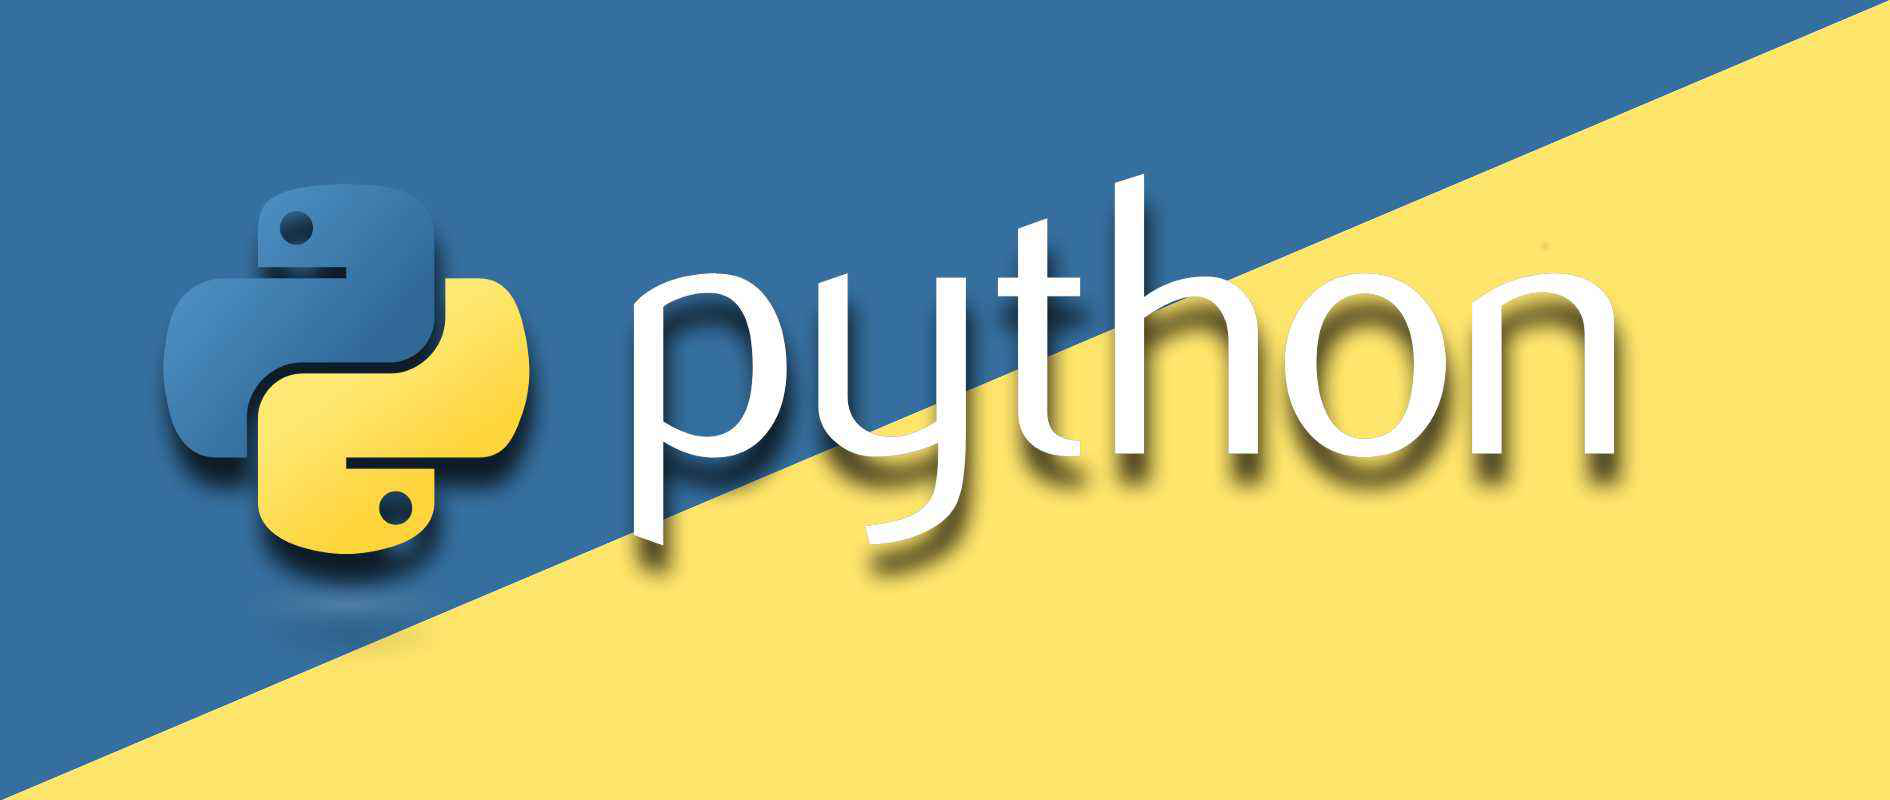

In [4]:
from PIL import Image
pic = Image.open("./pic/py.jfif")
pic

In [6]:
help(pic)

Help on JpegImageFile in module PIL.JpegImagePlugin object:

class JpegImageFile(PIL.ImageFile.ImageFile)
 |  JpegImageFile(fp=None, filename=None)
 |  
 |  Base class for image file format handlers.
 |  
 |  Method resolution order:
 |      JpegImageFile
 |      PIL.ImageFile.ImageFile
 |      PIL.Image.Image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  draft(self, mode, size)
 |      Configures the image file loader so it returns a version of the
 |      image that as closely as possible matches the given mode and
 |      size. For example, you can use this method to convert a color
 |      JPEG to greyscale while loading it.
 |      
 |      If any changes are made, returns a tuple with the chosen ``mode`` and
 |      ``box`` with coordinates of the original image within the altered one.
 |      
 |      Note that this method modifies the :py:class:`~PIL.Image.Image` object
 |      in place. If the image has already been loaded, this method has no
 |      effect.


In [7]:
width, height = pic.size
pic.size

(1890, 800)

In [8]:
pic.format  # jfif其实就是jpeg

'JPEG'

补充一些图片格式的知识 https://baike.baidu.com/item/%E5%9B%BE%E7%89%87%E6%A0%BC%E5%BC%8F/381122?fr=aladdin

In [11]:
pic.save('./pic/py.png')  #打开时候没有透明通道 所以存回去也没有透明通道 不能凭空捏造

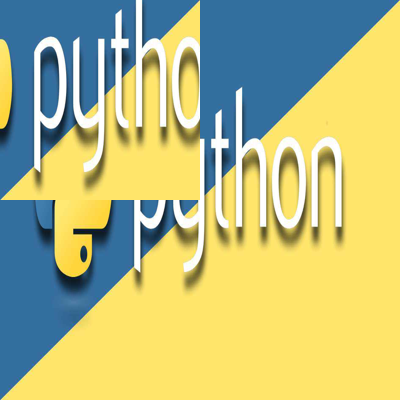

In [41]:
back = pic.copy().resize((400,400))

tmp = back.crop((100,100,300,300))
back.paste(tmp,(0,0))

back

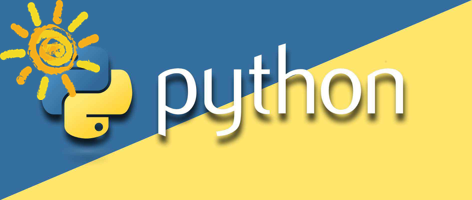

In [57]:
width, height = pic.size
back = pic.copy().resize((int(width/4),int(height/4)))

tmp = Image.open('./pic/武侠.png')
tmp = tmp.resize((100,100))  # resize 返回一个新的 赋值回去
back.paste(tmp,(0,0),tmp)   # 要想粘贴透明通道 必须再把图片传到第三个参数 

back

In [60]:
back.save('./pic/pyres.jpg')

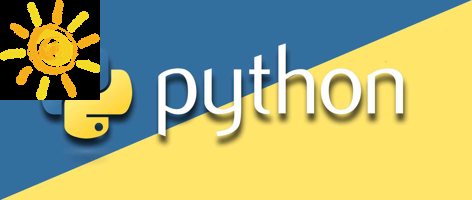

In [47]:
width, height = pic.size
back = pic.copy().resize((int(width/4),int(height/4)))

tmp = Image.open('./pic/武侠.png')
tmp = tmp.resize((100,100))  # resize 返回一个新的 赋值回去
back.paste(tmp,(0,0))   # 要想粘贴透明通道 必须再把图片传到第三个参数 

back

其他方法：  
1. rotate
2. transpose
3. getpixel putpixel

### 图像处理

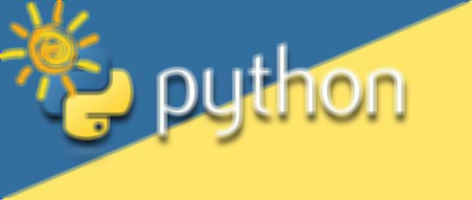

In [78]:
from PIL import ImageFilter, Image
im = Image.open('./pic/pyres.jpg')
im_blur = im.filter(ImageFilter.BLUR)
im_blur

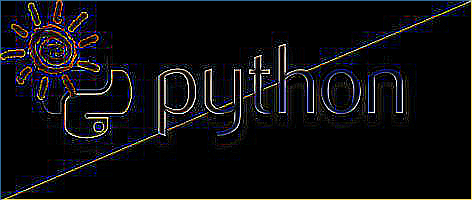

In [79]:
from PIL import ImageFilter, Image
im = Image.open('./pic/pyres.jpg')
im_blur = im.filter(ImageFilter.FIND_EDGES)
im_blur

### 类型转换和numpy

* opencv的图片imread进来更接近于一个np的array 但是通道是bgr 而不是rgb 
    1. 可以直接把opencv的mat对象当成array来用 问题不大
* pillow的图片open进来是自己的一个对象 
    1. 需要通过np.asarray变成np的array  
    2. 需要通过Image.fromarray 从array转回pillow对象

array就是个中介

opencv -> pillow  

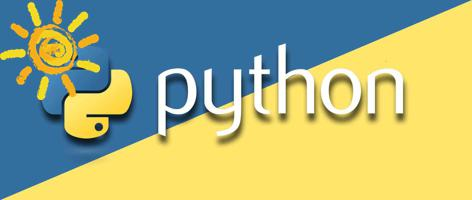

In [4]:
import cv2  
from PIL import Image
img = cv2.imread("./pic/pyres.jpg")
image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  
image

pillow -> opencv

In [1]:
import cv2  
from PIL import Image 
import numpy as np
image = Image.open("./pic/pyres.jpg")  
img = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)
cv2.imshow('frame', img)
cv2.waitKey (0)
cv2.destroyAllWindows()

### 摄像头捕获

In [2]:
import cv2

cap = cv2.VideoCapture(0) # 注意这里视频放在当前工作目录下，VideoCapture的参数就是视频文件名

while(cap.isOpened()): # isOpened方法判断视频是否成功打开
    ret, frame = cap.read() # read方法返回一个表示视频是否正确读取的布尔值和一帧图像

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 这里用cvtColor（cvt就是convert的缩写）方法进行色彩空间的转换，这里是从BGR空间转换到灰度空间
    
    edges = cv2.Canny(gray, 30, 70) # 边缘检测算子
    res = np.hstack((gray, edges)) # 边缘检测的结果和原结果水平拼接
    cv2.imshow('frame', res) # 通过imshow显示一帧图像
    if cv2.waitKey(1) & 0xFF == ord('q'): # 一帧显示一毫秒，通过上面的while循环不断地显示下一帧，从而形成动态的视频；按q键退出循环，关闭视频。
        break

cap.release()
cv2.destroyAllWindows()

# 应用举例

## PyAudio录音和播放  
http://people.csail.mit.edu/hubert/pyaudio/

In [1]:
!pip install PyAudio
!pip install tqdm

坑爹的是python3.8不支持pyaudio 又得开虚拟环境

录制的方式是开一个stream 然后把流中的内容读出来 作为data 写到二进制音频文件里面去

In [7]:
import pyaudio
import wave
from tqdm import tqdm

def record_audio(wave_out_path,record_second):
    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 2
    RATE = 16000
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,   # 这玩意的open不是个上下文管理器 没写enter和exit 
          channels=CHANNELS,
          rate=RATE,
          input=True,
          frames_per_buffer=CHUNK)
    
    with wave.open(wave_out_path, 'wb') as wf:
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        print("* recording")
        for i in tqdm(range(0, int(RATE / CHUNK * record_second))):
            data = stream.read(CHUNK)
            wf.writeframes(data)
        print("* done recording")
        
    stream.stop_stream()   # 
    stream.close()
    p.terminate()

    
record_audio("./source/pyaudioRec.wav",record_second=4)

ModuleNotFoundError: No module named 'pyaudio'

播放的方式是反过来 读出来二进制文件内容 写进流里面

In [2]:
import pyaudio
import wave
from tqdm import tqdm

def play_audio(wave_out_path):
    CHUNK = 1024
    p = pyaudio.PyAudio()

    with wave.open(wave_out_path, 'rb') as wf:  
        stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)
        data = wf.readframes(CHUNK)
        datas = []
        while len(data) > 0:
            data = wf.readframes(CHUNK)
            datas.append(data)
            
        print("* sound read")
        for i in tqdm(datas):
            stream.write(i)
        
        print("* done play")
        
    stream.stop_stream()   # 害得手动关闭这个流
    stream.close()
    p.terminate()

    
play_audio("./source/pyaudioRec.wav")

  3%|████▏                                                                                                                              | 2/62 [00:00<00:04, 14.61it/s]

* sound read


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62/62 [00:03<00:00, 15.83it/s]


* done play


如果想用声音大小作为录音的门限  
1. 要用均方根函数 把字节流处理一番 获得声音的大小 
2. 检查声音大于某个门限就开始录音过程 并给一个固定的延迟 比如4秒
3. 如果超过了延迟 就开始等待回落到门限以下 停止录音 再给一个总长度控制 例如十秒

In [56]:
import pyaudio
import wave
import time
import struct
import math

def rms(data):
    count = len(data)/2  # 看看data总共几个字节的长度
    format = "%dh"%(count)
    shorts = struct.unpack( format, data )  # 解包一下 转数字了
    sum_squares = 0.0
    for sample in shorts:
        n = sample * (1.0/32768)  # 数字采样  9bit 
        sum_squares += n*n
    return math.sqrt( sum_squares / count )*10  # 均方根



CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,   # 这玩意的open不是个上下文管理器 没写enter和exit 
      channels=CHANNELS,
      rate=RATE,
      input=True,
      frames_per_buffer=CHUNK)

while True:
    data = stream.read(CHUNK)
    print('%4.2f' % rms(data),end=' ')


0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.02 0.80 2.04 1.98 3.33 3.37 3.15 2.90 2.58 2.46 2.53 2.02 1.94 1.75 1.29 0.73 0.38 0.18 0.08 0.05 0.03 0.03 0.03 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 0.25 0.34 0.43 0.40 0.43 0.43 0.35 0.23 0.19 0.24 0.16 0.15 0.08 0.05 0.03 0.03 0.02 0.01 0.01 0.00 0.00 0.00 0.00 0.01 0.01 0.00 0.00 0.00 0.00 0.14 0.43 0.55 0.33 0.25 0.25 0.17 0.11 0.08 0.07 0.38 0.99 0.96 0.60 0.32 0.22 0.32 0.51 0.24 0.27 0.31 0.31 0.29 0.25 0.21 0.19 0.18 0.18 0.17 0.42 0.66 0.22 0.14 0.07 0.04 0.02 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.05 0.05 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.01 0.01 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

KeyboardInterrupt: 

## ffmpeg牛刀

播放音频 换个工具 用ffmpeg 杀鸡用牛刀

ffmpeg  
https://github.com/FFmpeg/FFmpeg  

In [10]:
import os
os.system("ffplay ./source/pyaudioRec.wav -nodisp -autoexit")

0

## SoundTouch变声

一个基于pyaudio和SoundTouch的汤姆猫变声程序  
https://github.com/bosima/raspberrypi-tomcat  
在路径Example/TomCat下

SoundTouch是一个处理音频的工具  
win直接下载exe文件 添加到环境变量path即可（压缩包已经放在仓库中 自寻）  
linux要自己编译一下  
https://www.surina.net/soundtouch/download.html

## 字符画  

In [3]:
import matplotlib.pyplot as plt
import cv2
show_heigth = 50             
show_width = 100
#这两个数字是调出来的

# ascii_char = list("$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,\"^`'. ")
ascii_char = '@%#*+=-   '
#生成一个ascii字符列表
char_len = len(ascii_char)

pic = plt.imread("./pic/1000.png")
#使用plt.imread方法来读取图像，对于彩图，返回size = heigth*width*3的图像
#matplotlib 中色彩排列是R G B
#opencv的cv2中色彩排列是B G R

pic_heigth,pic_width,_ = pic.shape
#获取图像的高、宽

gray = 0.2126 * pic[:,:,0] + 0.7152 * pic[:,:,1] + 0.0722 * pic[:,:,2]
#RGB转灰度图的公式 gray = 0.2126 * r + 0.7152 * g + 0.0722 * b

#思路就是根据灰度值，映射到相应的ascii_char
for i in range(show_heigth):
    #根据比例映射到对应的像素
    y = int(i * pic_heigth / show_heigth)
    text = ""
    for j in range(show_width):
        x = int(j * pic_width / show_width)
        text += ascii_char[int(gray[y][x] * char_len)]
    print(text)

-----------                           %%%%%%%%%%%%%%%%%@%%@@@@@@@@@@@%%%%%@@@@@@@@%@*            - -
------------                        =%%%%%%%%%%%%%@%@@%%@%@@%@@@%%%%%%%%%%%%@@@@@@@@@%--            
--------                           -%%%@@%%@%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%@@@@%@@@@%%=            
----                               #%@%@@%@%@##+#%+##++*%%%%%%%%%%%%%%%%%%%%%@@@@%@@@@@@-           
--                                -%@@%%%%*-=---     --+#**********##*#####%%%@@@@@@@@@@=           
                                  -@%@@%%#=-=-        ---=-===++++*****##%#%%%%@@@@@@@@@#           
                                  =@%@%%%+==--         --=+----==++++*####%%%%%@@@@@@@@@+           
                                   =%%@%*===-==- =------=+ =-==++=++**###%%%%%%@@@@@@@%#            
                                 +#-=#%#=====++++*%%######-=*#+#%%%%%%%%%%%%%%%%@@@@@%%             
                                  +-==%#==-===-   -=*****=-*%%*=--==+*#%%%%%%%%%@@%%%%%    

其实吧 pillow的转灰度更简单

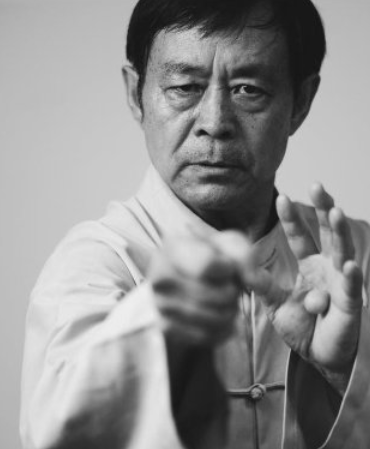

In [62]:
from PIL import Image
pic = Image.open("./pic/1000.png")
gray = pic.convert('L')
gray

接着通过getpixel方法去拿每一个像素的灰度值 pillow不能直接索引

In [71]:
gray.getpixel((300,300))

103

于是代码可以改写为：

In [77]:
from PIL import Image

pic = Image.open("./pic/1000.png")
gray = pic.convert('L')
w,h = gray.size

show_heigth = 50             
show_width = 100
ascii_char = '@%#*+=-   '

for i in range(show_heigth):
    y = int(i * h / show_heigth)
    text = ""
    for j in range(show_width):
        x = int(j * w / show_width)
        text += ascii_char[int(gray.getpixel((x,y))/255 * len(ascii_char))]
    print(text)

-----------                           %%%%%%%%%%%%%%%%%@%%@@@@@@@@@@@%%%%%@@@@@@@@%@*            - -
------------                        =%%%%%%%%%%%%%@%%@%%%%@@%@@@%%%%%%%%%%%%@@@@@@@@@%--            
--------                           -%%%@@%%@%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%@@@@%@@@@%%=            
----                               #%@%@@%@%@#*+#%+*#=+*%%%%%%%%%%%%%%%%%%%%%@@@@%@@@@@@-           
--                                -%@@%%%%*-=---      -+#*+********##*#####%%%@@@@@@@@@@=           
                                  -@%@@%%#=---        ---=-=-=++++*****##%##%%%@@@@@@@@@#           
                                  =@%@%%%+=---         --=+----====++*#####%%%%@@@@@@@@@+           
                                   =#%@%+=-=-==- -------=+ --==++=++**###%%%%%%@@@@@@@%#            
                                 +#-=*%#===-=++++*#%###*##-=+#+#%%%%%%%%%%%%%%%%@@@@@%%             
                                  +-==%#=--==--   -=**+**=-+%%*=---==*#%%%%%%%%%@@%%%%%    

扩展  
像素画 首先弄一个图片集例如二十张 把每一张图片都做成灰度图统计总亮度之后排序  
排序之后用不同亮度的图片做成马赛克 模拟字符画的样子来绘图

扩展  
马赛克的去除 有一个算法叫做inpaint ai实现的修补和想象  
deepfake是违法的么  

## 字符视频 
/Examples/chr/chr-video.py

扩展   
能否直接把摄像头数据读下来 人像分割之后用字符画播放呢？能做到多少fps？  
摄像头拍摄视频里面 有倾斜的ppt 能否经过边缘识别和变换拉平到正常视角呢？  
https://www.jb51.net/article/164348.htm 示例代码  
能否做一个人像实时定位更换背景的程序 opencv来实现 用网络的api速度太慢了来不及

## 自然语言 聊天机器人

图灵机器人  
http://www.turingapi.com/  
100次每天 不得行啊老铁

In [69]:
import requests

s = '你真是个小机灵鬼'

def tuling(s):
    cont = {
        "reqType":0,
        "perception": {
            "inputText": {
                "text": s
            },
            "selfInfo": {
                "location": {
                    "city": "北京",
                    "province": "北京",
                    "street": "信息路"
                }
            }
        },
        "userInfo": {
            "apiKey": "faab636f0ce44eae976865beda85acbf",
            "userId": "233875"
        }
    }
    http = requests.post("http://openapi.tuling123.com/openapi/api/v2", json=cont)
    http.encoding = 'utf8'
    temp = http.json()
    return temp['results'][0]['values']['text']

tuling(s)

'嘻嘻，就知道你认为我是可爱的。'

青云客机器人  
http://api.qingyunke.com/  
200次10分钟 凑合用吧

In [4]:
import requests

s = '你真是个小机灵鬼'
http = requests.get("http://api.qingyunke.com/api.php", {'key': 'free', 'appid': 0, 'msg': s})
http.encoding = 'utf8'
temp = http.json()
temp

{'result': 0, 'content': '你个娃神'}

如果让他自己跟自己递归着唠嗑……

In [5]:
import requests
s = '你真是个小机灵鬼'


for i in range(20):
    http = requests.get("http://api.qingyunke.com/api.php", {'key': 'free', 'appid': 0, 'msg': s})
    http.encoding = 'utf8'
    temp = http.json()
    s = temp['content']
    print('bot'+str(i%2)+' '+s)

bot0 你个娃神
bot1 在那山的那边太湖的那边长兴的那边有一群葫芦娃~啊啊啊啊啊~她们活泼又善良~啊啊啊啊~
bot0 咋了你？发颠啊
bot1 曾呼吸过空气
bot0 人人叫我老外
bot1 我就一个脑袋，思想再活跃也有局限性
bot0 看云悠悠荡荡
bot1 与其说是聊天，不如说是问答式的吧
bot0 额~聊得开心不
bot1 菲菲无法体会开心是种什么感觉
bot0 对不起，我没明白你的意思……
bot1 笨
bot0 你比我笨多了
bot1 如果多吃鱼可以补脑让人变聪明的话，那么你至少得吃一对儿鲸鱼……
bot0 要说聪明，数菲菲~！
bot1 iq两百加，不惶多让～
bot0 大美人
bot1 大美人，给我抱个
bot0 大美人，给我抱个
bot1 大美人，给我抱个


扩展  
分析一下聊天机器人的词汇量  
还有一些积极消极的ai判断模型

## 百度的ai库介绍

1. ocr
2. 语音识别
3. 语音合成
4. 通用物体识别
5. 人脸识别 是不是可以用来稍微训练一些 opencv扒视频图片用来训练
6. 颜值识别

百度有一个aip库专门为python准备的  
https://github.com/Baidu-AIP 在里面还有别的语言的sdk

In [1]:
!pip install baidu-aip

  Created wheel for baidu-aip: filename=baidu_aip-2.2.18.0-py3-none-any.whl size=15225 sha256=5c7bcfc7a64777e297711bfe17280227de61e7bcdeadb7bb3a7008dc6b862826
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\1c\17\94\304979ac65aa3e6ff7b2c859d44a7b842b0112ac7d9acecf47
Successfully built baidu-aip


需要注册一个应用 作为容器 里面装了各类ai的服务  
这个应用本身有一个key和secretkey 我自己注册了个不要盗用  
appid: 23060232  
key：3ir19ZLQOciXCGrG4DgaKRje  
secretkey： E8w5rnuH5USQmaHnsq4Q88PUlcMpP6IP

https://ai.baidu.com

## OCR

In [2]:
from aip import AipOcr
# 定义变量
AppID = "23060232"  #账号ID
APIkey = "3ir19ZLQOciXCGrG4DgaKRje "  #针对接口访问的授权方式
SecretKey = "E8w5rnuH5USQmaHnsq4Q88PUlcMpP6IP"  #密钥

# 初始化操作
client = AipOcr(AppID, APIkey, SecretKey)

In [42]:
with open('./pic/ocr-pic.jfif', 'rb') as f:  # 二进制方式读图 拿到字节流
    content = f.read()
    api_result = client.basicGeneral(content)  # 访问client提供的basicGeneral 基本OCR方法
    print(api_result)

{'words_result': [{'words': '中午,胡小懒跟公司的同事去附近的餐馆吃饭,附近所有的餐馆'}, {'words': '都人满为患,往往需要等位,午餐时间至少需要45分钟。吃完午饭回'}, {'words': '来,趴在桌子上睡个午觉,午睡醒来后,胡小懒往往觉得这一天才真'}, {'words': '正开始。'}, {'words': '通常,胡小懒要用至少半个小时的时间才能从午睡状态中清醒过'}, {'words': '来,再处理一些琐事,下午就这么过去了。如果部门开会,时间就在领'}, {'words': '导的演讲和大家低头玩手机中度过了'}, {'words': '下班后吃点东西,坐地铁回到家,已经八点左右了。他虽然白天在'}, {'words': '公司没做什么事情,但下班回家后仍然觉得十分累,除了窝在床上看美'}, {'words': '剧之外,别的什么也不想做。'}, {'words': '胡小懒临睡前看着乱糟糟的房间,眉头一皱,但心里却乐观地期待'}, {'words': '着周末的到来,想着周末一定要大干一场,让整个房间焕然一新。可周'}, {'words': '末到了,就真的能够像他自己期待的那样吗?'}, {'words': '胡小懒的周未通常是这样过的:宅在家里,随便找部美剧或者网络'}, {'words': '小说打发时间,觉得日子过得很愜意。朋友邀请过他很多次,想周末一'}, {'words': '起吃个饭,但胡小懒都以“下次吧”敷衍了过去。因为他觉得,好好一'}, {'words': '个周末,还需要像平时一样穿得周周正正地出门,还得坐车去到约好的'}, {'words': '地点,真是太烦人了。'}, {'words': '就这样,与胡小懒联系的朋友越来越少,而他自己根本就没有意'}, {'words': '识到'}, {'words': '像胡小懒这样看似每天都有事做,实际上却是一直在混日子的上'}, {'words': '班族并不少见。而他们中的很多人并不觉得自己是在混日子,只是怀'}, {'words': '才不遇。'}, {'words': '爱因斯坦在解释相对论时曾说过一个著名的比喻:“一个男人与美'}, {'words': '女对坐1小时,会觉得似乎只过了1分钟;但如果让他坐在热火炉上1'}], '

返回的json结构如下

In [38]:
api_result

{'words_result': [{'words': '中午,胡小懒跟公司的同事去附近的餐馆吃饭,附近所有的餐馆'},
  {'words': '都人满为患,往往需要等位,午餐时间至少需要45分钟。吃完午饭回'},
  {'words': '来,趴在桌子上睡个午觉,午睡醒来后,胡小懒往往觉得这一天才真'},
  {'words': '正开始。'},
  {'words': '通常,胡小懒要用至少半个小时的时间才能从午睡状态中清醒过'},
  {'words': '来,再处理一些琐事,下午就这么过去了。如果部门开会,时间就在领'},
  {'words': '导的演讲和大家低头玩手机中度过了'},
  {'words': '下班后吃点东西,坐地铁回到家,已经八点左右了。他虽然白天在'},
  {'words': '公司没做什么事情,但下班回家后仍然觉得十分累,除了窝在床上看美'},
  {'words': '剧之外,别的什么也不想做。'},
  {'words': '胡小懒临睡前看着乱糟糟的房间,眉头一皱,但心里却乐观地期待'},
  {'words': '着周末的到来,想着周末一定要大干一场,让整个房间焕然一新。可周'},
  {'words': '末到了,就真的能够像他自己期待的那样吗?'},
  {'words': '胡小懒的周未通常是这样过的:宅在家里,随便找部美剧或者网络'},
  {'words': '小说打发时间,觉得日子过得很愜意。朋友邀请过他很多次,想周末一'},
  {'words': '起吃个饭,但胡小懒都以“下次吧”敷衍了过去。因为他觉得,好好一'},
  {'words': '个周末,还需要像平时一样穿得周周正正地出门,还得坐车去到约好的'},
  {'words': '地点,真是太烦人了。'},
  {'words': '就这样,与胡小懒联系的朋友越来越少,而他自己根本就没有意'},
  {'words': '识到'},
  {'words': '像胡小懒这样看似每天都有事做,实际上却是一直在混日子的上'},
  {'words': '班族并不少见。而他们中的很多人并不觉得自己是在混日子,只是怀'},
  {'words': '才不遇。'},
  {'words': '爱因斯坦在解释相对论时曾说过一个著名的比喻:“一个男人与美'},
  

In [41]:
for i in range(api_result['words_result_num']):
    print(api_result['words_result'][i]['words'])

中午,胡小懒跟公司的同事去附近的餐馆吃饭,附近所有的餐馆
都人满为患,往往需要等位,午餐时间至少需要45分钟。吃完午饭回
来,趴在桌子上睡个午觉,午睡醒来后,胡小懒往往觉得这一天才真
正开始。
通常,胡小懒要用至少半个小时的时间才能从午睡状态中清醒过
来,再处理一些琐事,下午就这么过去了。如果部门开会,时间就在领
导的演讲和大家低头玩手机中度过了
下班后吃点东西,坐地铁回到家,已经八点左右了。他虽然白天在
公司没做什么事情,但下班回家后仍然觉得十分累,除了窝在床上看美
剧之外,别的什么也不想做。
胡小懒临睡前看着乱糟糟的房间,眉头一皱,但心里却乐观地期待
着周末的到来,想着周末一定要大干一场,让整个房间焕然一新。可周
末到了,就真的能够像他自己期待的那样吗?
胡小懒的周未通常是这样过的:宅在家里,随便找部美剧或者网络
小说打发时间,觉得日子过得很愜意。朋友邀请过他很多次,想周末一
起吃个饭,但胡小懒都以“下次吧”敷衍了过去。因为他觉得,好好一
个周末,还需要像平时一样穿得周周正正地出门,还得坐车去到约好的
地点,真是太烦人了。
就这样,与胡小懒联系的朋友越来越少,而他自己根本就没有意
识到
像胡小懒这样看似每天都有事做,实际上却是一直在混日子的上
班族并不少见。而他们中的很多人并不觉得自己是在混日子,只是怀
才不遇。
爱因斯坦在解释相对论时曾说过一个著名的比喻:“一个男人与美
女对坐1小时,会觉得似乎只过了1分钟;但如果让他坐在热火炉上1


扩展  
阅读器 外置摄像头 语音控制 开始拍照之后ocr 然后语音合成 朗读  
四则运算验证器 读进来公式 清洗之后让python求值

## 语音识别

https://ai.baidu.com/ai-doc/SPEECH/1k4o0bmc7

In [8]:
from aip import AipSpeech
# 定义变量
AppID = "23060232"  #账号ID
APIkey = "3ir19ZLQOciXCGrG4DgaKRje "  #针对接口访问的授权方式
SecretKey = "E8w5rnuH5USQmaHnsq4Q88PUlcMpP6IP"  #密钥

client  = AipSpeech(AppID,APIkey,SecretKey)

In [11]:
import os

wav_file = './source/pyaudioRec.wav'
os.system("ffmpeg -y  -i ./source/pyaudioRec.wav  -acodec pcm_s16le -f s16le -ac 1 -ar 16000 ./source/pyaudioRec.pcm")

0

In [4]:
pcm_file = './source/pyaudioRec.pcm'
with open(pcm_file,'rb') as fp:
    fileContext = fp.read()

res = client.asr(fileContext,'pcm',16000,{'dev_pid': 1537,})
res

{'err_msg': 'request pv too much',
 'err_no': 3305,
 'sn': '95719466651606650427'}

扩展  
用语音门限做激活 然后使用命令结合微信控制器一节介绍的控制器 做各种指令  
听写器 滚动听写使用实时听写 听了之后记录txt 然后翻译  百度有同声传译模块

## 语音合成

In [5]:
from aip import AipSpeech
# 定义变量
AppID = "23060232"  #账号ID
APIkey = "3ir19ZLQOciXCGrG4DgaKRje "  #针对接口访问的授权方式
SecretKey = "E8w5rnuH5USQmaHnsq4Q88PUlcMpP6IP"  #密钥

client  = AipSpeech(AppID,APIkey,SecretKey)

文档：https://github.com/Baidu-AIP/python-sdk/blob/master/aip/speech.py

In [6]:
import os

def speak(robot_s):
    synth_context = client.synthesis(robot_s, "zh", 1, {   
            "vol": 2,
            "spd": 4,
            "pit": 5,
            "per": 0
        })
    with open('./source/baiduaipsynout.mp3', 'wb') as f:
        f.write(synth_context)

    os.system("ffplay "+"./source/baiduaipsynout.mp3 -nodisp -autoexit")
    
speak('语音合成？')

## 人脸比对

文档：https://ai.baidu.com/ai-doc/FACE/Lk37c1tpf

In [7]:
from aip import AipFace
# 定义变量
AppID = "23060232"  #账号ID
APIkey = "3ir19ZLQOciXCGrG4DgaKRje "  #针对接口访问的授权方式
SecretKey = "E8w5rnuH5USQmaHnsq4Q88PUlcMpP6IP"  #密钥

# 初始化操作
client = AipFace(AppID, APIkey, SecretKey)

In [33]:
import base64

def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        image = base64.b64encode(fp.read())
        image64 = str(image,'utf-8')           
        # v3版本必须使用base64编码来处理图片  网上好多教程用了v2版本 直接用字节流的 注意区别
        # 如果非要使用v2版本 就需要改动baidu-aip的源代码中的请求地址 可以尝试使用源代码pip install -e .的动态安装方式来使用
        # 或者自己写请求头
        return image64

images = [
            {
                "image": get_file_content('./pic/daishi.jpg'),
                "image_type": "BASE64",
                "face_type": "LIVE",
                "quality_control": "LOW",
                "liveness_control": "LOW"
            },
            {
                "image": get_file_content('./pic/mabaoguo.jpg'),
                "image_type": "BASE64",
                "face_type": "IDCARD",
                "quality_control": "LOW",
                "liveness_control": "LOW"   # 活体检测 防止用假人 这个水平调到high就不认识马带师了
            }
        ]

result_json=client.match(images);
print(result_json)

{'error_code': 0, 'error_msg': 'SUCCESS', 'log_id': 7984550515459, 'timestamp': 1606633325, 'cached': 0, 'result': {'score': 74.23707581, 'face_list': [{'face_token': 'ec7e30d9b2219c1ea8bb919c3da00640'}, {'face_token': '046cb0677036dfd3a554275be6371568'}]}}


补充：base64编码  
目的是把二进制数据让人能看懂  
取三个字节为单位 截断为4个6bit  
每个6bit小节其实就只有2的6次方 也就是64种可能  
对应一个64位的编码表 把6bit换成一个8bit的可理解编码表示 就能肉眼看懂了  
但是长度增加了 目的就是为了理解  
只适合用来网络传输短数据

扩展  
识别到有某些人从摄像头经过 就采取一些动作

## 人像分割

https://cloud.baidu.com/doc/BODY/s/Rk3cpyo93

使用百度飞桨的案例  
https://aistudio.baidu.com/aistudio/projectdetail/1176398

抽帧

In [33]:
import cv2

def transform_video_to_image(video_file_path, img_path):
    video_capture = cv2.VideoCapture(video_file_path)
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    count = 0
    while True:
        ret, frame = video_capture.read()
        if ret:
            cv2.imwrite(img_path + '%d.jpg' % count, frame)
            count += 1
        else:
            break
    video_capture.release()

    print('视频图片保存成功, 共有 %d 张' % count)
    return fps


video_file_path = './Examples/chr/马保国五连鞭.mp4'
fps = transform_video_to_image(video_file_path, './pic/fivefive/')

视频图片保存成功, 共有 611 张


In [49]:
from aip import AipBodyAnalysis
# 定义变量
AppID = "23064586"  #账号ID
APIkey = "RuUdds5Z53rOzuU4G13hGh1A "  #针对接口访问的授权方式
SecretKey = "t5lNRZjpzL2C1la5eE7C2dDGFIybUShj"  #密钥

# 初始化操作
client = AipBodyAnalysis(AppID, APIkey, SecretKey)

单张处理

In [45]:
with open('./pic/fivefive/1.jpg', 'rb') as fp:
    image = fp.read()
    res = client.bodySeg(image)

In [46]:
import base64
with open('./pic/fivefive/1-c.jpg','wb') as fp:
    fp.write(base64.b64decode(res['foreground']))

小伙子 不能不讲武德循环处理

In [51]:
import base64
for i in range(611):
    pathname = './pic/fivefive/'
    with open(pathname+str(i)+'.jpg', 'rb') as fp:  # 开原图
        image = fp.read()
        res = client.bodySeg(image)
        with open(pathname+str(i)+'-c.jpg','wb') as fp: # 保存切割图
            fp.write(base64.b64decode(res['foreground']))

害得给32位RGBA的结果 填充上白色背景变成RGB 24位

In [52]:
from PIL import Image
import cv2
import numpy as np

for i in range(611):
    pathname = './pic/fivefive/'

    oriIm = cv2.imread(pathname+str(i)+'-c.jpg',-1)  # -1 有多少通道读多少通道 不受jpg扩展名的限制
    I = np.full((oriIm.shape[0],oriIm.shape[1]),255,dtype=np.uint8) # 空白灰度图
    newIm = cv2.cvtColor(I,cv2.COLOR_GRAY2BGR) # 灰度图变成rgb空白图
    result = np.zeros((oriIm.shape[0],oriIm.shape[1],3),np.uint8) # 空结果作为输出

    alpha = oriIm[:,:,3] / 255.0 
    for ch in range(3):                  
        result[:,:,ch] = (1. - alpha) * newIm[:,:,ch] + alpha * oriIm[:,:,ch] # 混合透明通道

    cv2.imwrite(pathname+str(i)+'-d.jpg',result)


如果用pillow就可以简化很多了 处理一张图片试试

In [61]:
from PIL import Image
pathname = './pic/fivefive/'
oriIm = Image.open(pathname+'1-c.jpg')
width, height = oriIm.size
newIm = Image.new('RGB', (width, height), 'Black')
newIm.paste(oriIm,(0,0),oriIm)
newIm.save('./pic/pillowcutalpha.jpg')

opencv合成视频

In [54]:
import cv2

img = cv2.imread('./pic/fivefive/1-d.jpg')
imgInfo = img.shape
size = (imgInfo[1],imgInfo[0])
print(size)
#完成写入对象的创建，
#第一个参数是合成之后的视频的名称，
#第二个参数是可以使用的编码器，
#第三个参数是帧率即每秒钟展示多少张图片，
#第四个参数是图片大小信息

fourcc = cv2.VideoWriter_fourcc(*'XVID')
videowrite = cv2.VideoWriter('./Examples/chr/马保国.avi',fourcc,25.0,size)
for i in range(611):
    pathName = './pic/fivefive/'
    fileName = str(i) + '-d.jpg'
    img = cv2.imread(pathName+fileName,-1)
    videowrite.write(img)
    if i%100==0:
        print(i)
        
videowrite.release()
print('end!')



(860, 486)
0
100
200
300
400
500
600
end!


当然除了干这种无聊事情 可以把人像切割出来放到别的背景上去 不好么

## 微信相关接口itchat介绍

文档：https://itchat.readthedocs.io/zh/latest/#itchat  
源代码：https://github.com/littlecodersh/ItChat

能干点啥？
    1. 撤回消息记录
    2. 命令编写 用微信控制按键和鼠标
    3. 自动回复
    4. 好友删除判断  
再干点啥？
    5. 发消息给自己主机 调用摄像头截屏发给自己看看谁坐在电脑跟前
    6. 写个服务器收集信息发给自己


## 好友签名的词云分析

In [12]:
import itchat
import re

itchat.login()
friends = itchat.get_friends(update=True)[0:]
tList = []
for i in friends:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    tList.append(signature)

# 拼接字符串
text = "".join(tList)

itchat has already logged in.


In [23]:
import jieba 
import jieba.posseg as pseg
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import PIL.Image as Image


# 滤出所有名词
def foo(flag):
    if flag == 'n':
        return True
    return False

def get_stopwords_list():
    #按行制作list 并且去掉行首位的空格
    stopwords = [line.strip() for line in open('baidu_stopwords.txt',encoding='UTF-8').readlines()]  
    return stopwords

def remove_stopwords(sentence_list, stopwords_list):
    # 去停用词
    res = []
    for word in sentence_list:
        if word not in stopwords_list:
            word = re.sub(r'[0123456789，。.\s]+', '', word)  # 去掉数字标点和空格
            res.append(word)
    return res

words = pseg.cut(text,use_paddle=True)  # 生成器
N = [word for word,flag in words if foo(flag)] 
wordlist = remove_stopwords(N, get_stopwords_list())

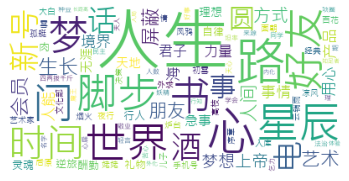

LOG OUT!


In [24]:
wl_space_split = " ".join(wordlist)

my_wordcloud = WordCloud(background_color="white", max_words=100, 
                         max_font_size=80, random_state=42,
                         font_path=r'C:\Windows\Fonts\msjh.ttc').generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
my_wordcloud.to_file("./pic/wechet_cloud_result.png")

## 收发文本和文件和语音

需要用装饰器装饰函数 其实真正的信息是装饰器接受的 在变成msg参数 给函数

In [6]:
import itchat

@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    print(msg)
    return msg.Content

    
itchat.auto_login(hotReload=True)
itchat.run()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 乘正
Start auto replying.


{'MsgId': '6084362581749520508', 'FromUserName': '@9749afdb92015ced9bfb9fff72610f50', 'ToUserName': '@9749afdb92015ced9bfb9fff72610f50', 'MsgType': 1, 'Content': 'hello', 'Status': 3, 'ImgStatus': 1, 'CreateTime': 1607413275, 'VoiceLength': 0, 'PlayLength': 0, 'FileName': '', 'FileSize': '', 'MediaId': '', 'Url': '', 'AppMsgType': 0, 'StatusNotifyCode': 0, 'StatusNotifyUserName': '', 'RecommendInfo': {'UserName': '', 'NickName': '', 'QQNum': 0, 'Province': '', 'City': '', 'Content': '', 'Signature': '', 'Alias': '', 'Scene': 0, 'VerifyFlag': 0, 'AttrStatus': 0, 'Sex': 0, 'Ticket': '', 'OpCode': 0}, 'ForwardFlag': 0, 'AppInfo': {'AppID': '', 'Type': 0}, 'HasProductId': 0, 'Ticket': '', 'ImgHeight': 0, 'ImgWidth': 0, 'SubMsgType': 0, 'NewMsgId': 6084362581749520508, 'OriContent': '', 'EncryFileName': '', 'User': <User: {'MemberList': <ContactList: []>, 'UserName': '@9749afdb92015ced9bfb9fff72610f50', 'City': '杭州', 'DisplayName': '', 'PYQuanPin': 'chengzheng', 'RemarkPYInitial': '', 'Prov

LOG OUT!


接上聊天机器人

In [70]:
import requests
import itchat


@itchat.msg_register(itchat.content.TEXT)
def text_reply(msg):
    return tuling(msg)

itchat.auto_login(hotReload=True)
itchat.run()



Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 乘正
Start auto replying.
Bye~


收发文件

In [34]:
import itchat
from itchat.content import *    # 这里面包含了各种消息类型 必须加入


@itchat.msg_register([PICTURE, RECORDING, ATTACHMENT, VIDEO])
def download_files(msg):
    msg.download(msg.fileName)
    itchat.send('@%s@%s' % (
        'img' if msg['Type'] == 'Picture' else 'fil', msg['FileName']),
        msg['FromUserName'])
    return '%s received' % msg['Type']


itchat.auto_login(hotReload=True)
itchat.run()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 乘正
Start auto replying.
Bye~


## 微信播放控制器

pyautogui 可以模拟按键  
https://github.com/asweigart/pyautogui

In [ ]:
import requests
import itchat
import random
import ctypes
import struct
import pyautogui

@itchat.msg_register(itchat.content.TEXT)
def get_response(msg):
    str = msg['Text']
    # if msg['NickName'] == '乘正':
    if str == 'p':
        pyautogui.press('space')
    if str == 'u':
        pyautogui.press('up')
    if str == 'd':
        pyautogui.press('down')
    if str == 'r':
        pyautogui.press('right')
    if str == 'l':
        pyautogui.press('left')

itchat.auto_login(hotReload=True)
itchat.run()

## 网易云音乐

In [7]:
!pip install NetEaseMusicApi

https://github.com/littlecodersh/NetEaseMusicApi  
好像只支持到python3.5